In [1]:
import utils
from importlib import reload
import torch
import numpy as np
from PIL import Image

def redo():
    reload(utils)

redo()

In [2]:
utils.init()

{'trained_betas'} was not found in config. Values will be initialized to default values.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.13.self_attn.v_proj.bias', 'vision_model.encoder.layers.17.mlp.fc1.bias', 'vision_model.encoder.layers.17.self_attn.q_proj.weight', 'vision_model.encoder.layers.4.self_attn.v_proj.weight', 'vision_model.encoder.layers.2.self_attn.k_proj.weight', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.encoder.layers.17.self_attn.out_proj.weight', 'vision_model.encoder.layers.8.layer_norm2.weight', 'vision_model.encoder.layers.11.layer_norm1.bias', 'vision_model.encoder.layers.10.self_attn.k_proj.bias', 'vision_model.encoder.layers.14.mlp.fc1.bias', 'vision_model.encoder.layers.3.self_attn.q_proj.bias', 'vision_model.encoder.layers.18.layer_norm2.bias', 'vision_model.encoder.layers.12.self_attn.v

# USE CASES

## generate image from text

In [3]:
redo()
#prompt = "windstorm sand etched curio"
prompt = "dog"
#ims = utils.im([prompt]*4)
#utils.image_grid(ims, 2, 2)

In [5]:
# load image from disk and convert to numpy array
I = Image.open('imgs/gregg.jpeg')
I = I.resize((512, 512)) # resize to 512x512
x = np.asarray(I)
z = utils.encode_im(x)

In [6]:
type(z)

torch.Tensor

## put image into model

In [9]:
# load image from disk and convert to numpy array
I = Image.open('imgs/gregg.jpeg')
I = I.resize((512, 512)) # resize to 512x512
x = np.asarray(I)
z = utils.encode_im(x)
xp1 = utils.im("dog face", prior=z, start=10)
xp2 = utils.decode_im(z)

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

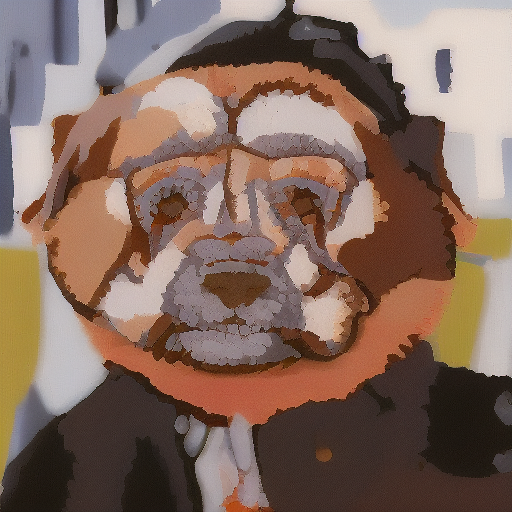

In [10]:
xp1[0]

In [ ]:
utils.image("dog")[0]

In [ ]:
start = 20
end = 100
num_images = 10
prompt = 'Tim Heidecker'

# generate the images
imgs = [utils.prompt_to_img3(prompt, num_inference_steps=end, latents=img_latents,
                      start_step=start)[0] for _ in range(0, num_images)]

# render them in the notebook
for img in imgs:
    display(img)

## perturb image in model and see the result

## move around latents and see what they code for

In [ ]:
latents = torch.randn((1, utils.unet.in_channels, 512 // 8, 512 // 8))
im = utils.prompt_to_img("dog", latents=latents)[0]
im

In [ ]:
utils.prompt_to_img('dog', latents=utils.perturb_latents(latents, scale=0.1))[0]

# SCRATCH